# f(x,y)=(a−x)^2+b∗(y−x^2)^2 

It has a global minimum at  (x,y)=(a,a^2) , where  f(x,y)=0 .


Rosenbrock function, gradient, and hessien


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

def rosenbrock(X, a=1, b=100):
    x, y = X
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(X, a=1, b=100):
    x, y = X
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

def rosenbrock_hess(X, a=1, b=100):
    x, y = X
    return np.matrix([
        [2 - 4 * b * (y - 3 * x**2), -4 * b * x],
        [-4 * b * x, 2 * b]
    ])

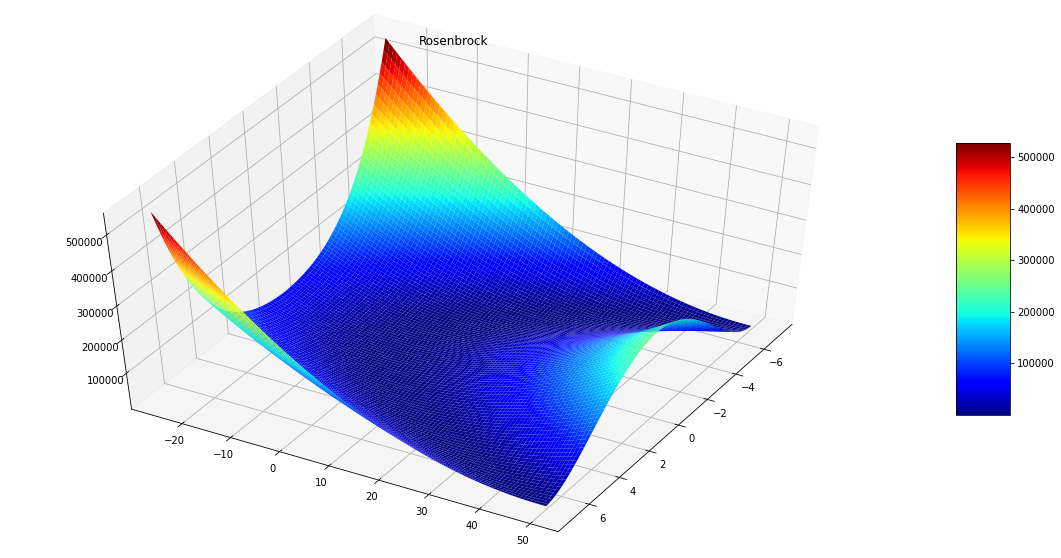

In [2]:
x = np.linspace(-7, 7, 100)
y = np.linspace(-25, 50, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock((X, Y))

fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.set_title('Rosenbrock')
ax.view_init(elev=50., azim=30)
s = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', edgecolor='none')
fig.colorbar(s, shrink=0.5, aspect=5)

# Gradient's direction
d= −∇xf(x)

∇xf(x)= [df/dx1 ....df/dxn]t

In [3]:
def gradient_descent(J_grad, x_init, alpha=0.01, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        x = x - alpha * J_grad(x)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

In [4]:
# Rosenbrock takes 2 input variables that we set to 0 at first
x_init = np.zeros(2)
x_min, it = gradient_descent(rosenbrock_grad, x_init, alpha=0.002, max_iterations=5000)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

x* = [0.99440769 0.98882419]
Rosenbrock(x*) = 3.132439308613923e-05
Grad Rosenbrock(x*) = [-0.00225342 -0.00449072]
Iterations = 5000


# Gradient direction + optimal step size
d=−α∇xf(x)

∇xf(x)= [df/dx1 ....df/dxn]t, α∈R

α  is the step size, usually in the range [0,1]. Unlike the usual gradient descent, here we want to find the optimal α at every iteration. Since at every step, the update is:

xk+1=xk−α∇xf(xk)
We want to make sure, that the chosen  α  is going to minimize as much as possible the target function  f . Therefore, we want  α  to be such that:

αk=arg min αf(xk−α∇xf(xk)) 

Since at iteration  k, xk and ∇xf(xk)  are constants, we can define  q(α) :

q(α)=f(xk−α∇xf(xk)) 

that is a function of one variable,  α . 
Therefore, we want to find the right  α  that will minimize  q . That task can be solved for instance using gradient descent itself.But since α is bounded ([0,1]), we will use the Golden Section Search algorithm: 


In [5]:
import numpy as np

In [6]:
def gss(f, a, b, tol=1e-7):
    phi = (np.sqrt(5) + 1) / 2
    d = b - (b - a) / phi
    c = a + (b - a) / phi

    while abs(d - c) > tol:
        if f(d) < f(c):
            b = c
        else:
            a = d

        d = b - (b - a) / phi
        c = a + (b - a) / phi

    return (a + b) / 2

def gradient_descent_optimal(J, J_grad, x_init, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        q = lambda alpha: J(x - alpha * J_grad(x))
        alpha = gss(q, 0, 1)
        x = x - alpha * J_grad(x)
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

In [7]:
# The Rosenbrock function takes 2 inputs
x_init = np.zeros(2)
x_min, it = gradient_descent_optimal(rosenbrock, rosenbrock_grad, x_init, max_iterations=3000)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

x* = [0.99438271 0.98879563]
Rosenbrock(x*) = 3.155407544747055e-05
Grad Rosenbrock(x*) = [-0.01069628 -0.00027067]
Iterations = 3000


# Newton's direction
d=−H^−1⋅f(x)⋅∇xf(x)

In [8]:
def newton(J_grad, J_hess, x_init, epsilon=1e-10, max_iterations=1000):
    x = x_init
    for i in range(max_iterations):
        x = x - np.linalg.solve(J_hess(x), J_grad(x))
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    return x, max_iterations

In [9]:
# The Rosenbrock function takes 2 inputs
x_init = np.zeros(2)
x_min, it = newton(rosenbrock_grad, rosenbrock_hess, x_init)
print('x* =', x_min)
print('Rosenbrock(x*) =', rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

x* = [1. 1.]
Rosenbrock(x*) = 0.0
Grad Rosenbrock(x*) = [0. 0.]
Iterations = 2
